In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from instron_processing import ureg, Q_
import instron_processing.instron_processing as ip
import pint
import pint_pandas

ureg = pint_pandas.PintType.ureg
ureg.setup_matplotlib()
ureg.formatter.default_format = 'P~'
ureg.mpl_formatter = "{:~P}"

# Homogeneous Samples

In [ ]:
# Load Data
dir = './homogeneous_foams'
strain_limits = (0, 0.05)

dfs_dense, metadata_dense = ip.load_samples(dir,
                                            # strain_threshold=0.01,
                                            fit_strain_limits=strain_limits,
                                            filter_fn=(lambda f: ('dense' in f.stem.lower())))

dfs_sparse, metadata_sparse = ip.load_samples(dir,
                                            #   strain_threshold=0.01,
                                              fit_strain_limits=strain_limits,
                                              filter_fn=(lambda f: 'sparse' in f.stem.lower()))

dfs_combo = [dfs_dense, dfs_sparse]
metadata_combo = [metadata_dense, metadata_sparse]

In [126]:
df = dfs_dense[0]
df.pint.dequantify()

m = metadata_dense[0]
m['slope'].to('MPa')

<Quantity(0.8896457, 'megapascal')>

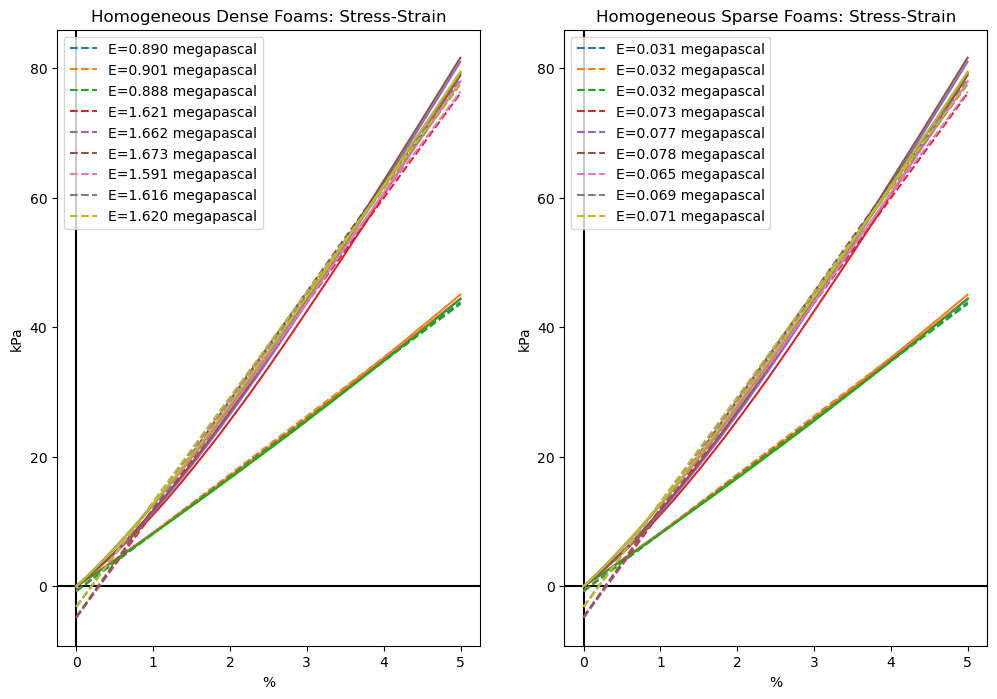

In [127]:
# Data to plot
x_col = 'Compressive strain (Displacement)'
y1_col = 'Compressive stress'
y2_col = 'Compressive stress (Line Fit)'
# x bounds of plot

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 8))
for ax in axs:
    ax.axvline(color='k')
    ax.axhline(color='k')

for ax, dfs, metadata in zip(axs, dfs_combo, metadata_combo):
    for i, df in enumerate(dfs_dense):
        mask = (df[x_col] >= strain_limits[0]) & (
            df[x_col] <= strain_limits[1])
        ax.plot(df[x_col][mask], df[y1_col][mask])
        ax.plot(df[x_col][mask], df[y2_col][mask],
                linestyle='dashed',
                color=ax.lines[-1].get_color(),
                label=f"E={metadata[i]['slope']:.3f}")

for ax, group_name in zip(axs, ['Dense', 'Sparse']):
    ax.legend()
    ax.set(title=f'Homogeneous {group_name} Foams: Stress-Strain',
           # yscale='log',
           #   xlabel='Strain (%)',
           #   ylabel='Stress (kPa)'
           )

# E_hi = np.mean([m['slope'] for m in metadata if m['slope'] > 1.])
# E_lo = np.mean([m['slope'] for m in metadata if m['slope'] < 1.])
# mod_ratio = E_hi / E_lo
# print(f"Mean High Density Modulus: {E_hi:.3f}")
# print(f"Mean Low Density Modulus: {E_lo:.3f}")
# print(f"High-Low Density Modulus Ratio: {mod_ratio:.3f}")

# Foam Metamaterials

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


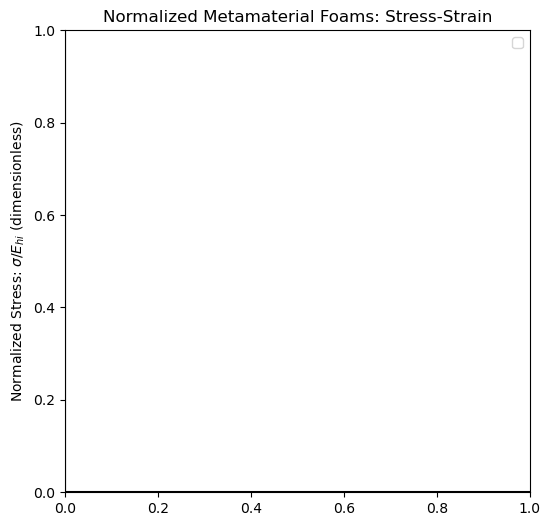

In [5]:
dir = './clean_data'
dfs, metadata = load_samples(dir,
                             fit_strain_limits=(0., 0.05),
                             filter_fn=lambda f: 'homogeneous' not in f.stem)

# Data to plot
x_col = 'Compressive strain (Displacement)'
y1_col = 'Compressive stress'
y2_col = 'Compressive stress (Line Fit)'
# x bounds of plot
xlim = (0, 0.1)

# Plotting
fig, ax = plt.subplots(figsize=(6, 6))
ax.axvline(color='k')
ax.axhline(color='k')

# Plot stress-strain curves for metamaterial foams, with stress normalized by the high density average modulus to match the normalization in the simulator
for i, df in enumerate(dfs):
    mask = (df[x_col] >= xlim[0]) & (df[x_col] <= xlim[1])
    ax.plot(df[x_col][mask], df[y1_col][mask]/E_hi,
            label=metadata[i]['filename'])
    ax.plot(df[x_col][mask], df[y2_col][mask]/E_hi,
            linestyle='dashed',
            color=ax.lines[-1].get_color(),
            label=rf"Line Fit: $E$={metadata[i]['slope']/E_hi:.3f}")
    print(metadata[i]['filename'])

ax.set(title='Normalized Metamaterial Foams: Stress-Strain',
       ylabel=r'Normalized Stress: $\sigma / E_{hi}$ (dimensionless)')
ax.legend()